<a href="https://colab.research.google.com/github/dsrojo10/PDS_UdeA/blob/main/Clase9_01_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clase #9 01-Mar-23
David Santiago Rojo C.

Este programa define una función H(z) que representa la transformada Z de una señal x[n], y utiliza la fórmula de residuos para calcular la transformada Z inversa de H(z). Luego, grafica la región de convergencia de la transformada Z y la señal resultante de la transformada Z inversa.

<ipython-input-8-9f3adaac7981>:30: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residues = np.array([np.complex(H(np.exp(2j*np.pi*k/20))/np.exp(2j*np.pi*k*n_val/20))/20 for k in range(20)])
<ipython-input-8-9f3adaac7981>:32: ComplexWarning: Casting complex values to real discards the imaginary part
  x_n[i] = np.sum(residues)


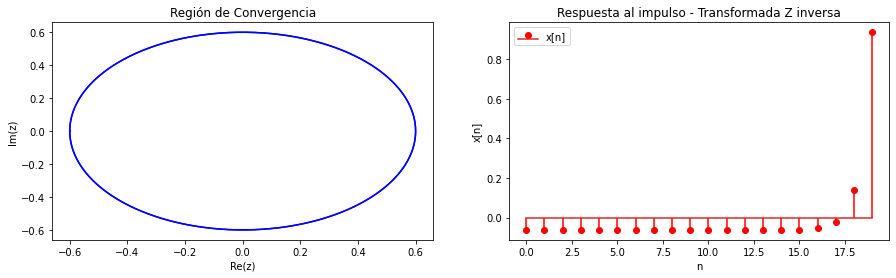

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definimos la función de la transformada Z
def H(z):
    return (z-1)/(z**2 - 1.2*z + 0.2)

# Definimos la región de convergencia de la transformada Z
R = abs(1.2/2)
theta = np.linspace(-np.pi, np.pi, 1000)
x = R*np.cos(theta)
y = R*np.sin(theta)

# Graficamos la región de convergencia
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)
ax.plot(x, y, 'b')
ax.plot(x, -y, 'b')
ax.set_title('Región de Convergencia')
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')

# Definimos el rango de valores de n para la transformada Z inversa
n = np.arange(0, 20)

# Calculamos la transformada Z inversa utilizando la fórmula de residuos
x_n = np.zeros(len(n))
for i, n_val in enumerate(n):
    # Calculamos los residuos
    residues = np.array([np.complex(H(np.exp(2j*np.pi*k/20))/np.exp(2j*np.pi*k*n_val/20))/20 for k in range(20)])
    # Sumamos los residuos
    x_n[i] = np.sum(residues)

# Graficamos la señal resultante de la transformada Z inversa
ax2 = fig.add_subplot(1,2,2)
ax2.stem(n, x_n, 'r', markerfmt='ro', label='x[n]')
ax2.set_title('Respuesta al impulso - Transformada Z inversa')
ax2.set_xlabel('n')
ax2.set_ylabel('x[n]')
ax2.legend()

plt.show()
